The Upper Confidence Bound algorithm is an algorithm that is based on the principle of optimism in the face of uncertainty. That suggests choosing actions as if the environment were as favorable as is plausibly possible. In this case, the mean rewards of the unknown is as large as plausibly possible based on the observed data. 

In [4]:
#implementing Upper Confidence Bound (UCB)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


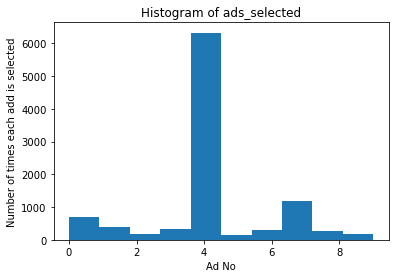

2178


In [2]:
#UCB needs to be implemented from scratch without using any package, as there is no easy library to use.

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            # 3 lines below is the algorithm shown above
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 #makes this large so that the first round gives every category a chance 
        if upper_bound > max_upper_bound:
            ad = i
            max_upper_bound = upper_bound
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

#Visualizing the result
plt.hist(ads_selected) #histogram of number of times each ad is clicked
plt.title('Histogram of ads_selected')
plt.xlabel('Ad No')
plt.ylabel('Number of times each add is selected')
plt.show()

#to view the reward
print(total_reward)

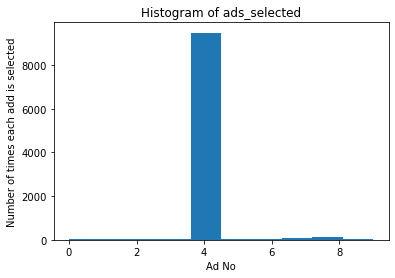

2606


In [3]:
import random

N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d #number of 0 rewards for each ad
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0 #maximum random draw
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            ad = i
            max_random = random_beta
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

plt.hist(ads_selected) #histogram of number of times each ad is clicked
plt.title('Histogram of ads_selected')
plt.xlabel('Ad No')
plt.ylabel('Number of times each add is selected')
plt.show()

#to view the reward
print(total_reward)

Useful resources:
- https://www.kaggle.com/sangwookchn/reinforcement-learning-using-scikit-learn
- https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/
- https://banditalgs.com/2016/09/18/the-upper-confidence-bound-algorithm/